In [8]:
import numpy as np
from cdo import *
cdo = Cdo()
from os import getenv

HOME = getenv('HOME')

bbox = '-20,20,-20,20'
bbox_ocgis = [-20,-22,20,20]

# global dataset CMIP5
resources = HOME+'/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-LR/historical/day/atmos/day/r1i1p1/v20111006/psl/psl_day_MPI-ESM-LR_historical_r1i1p1_20000101-20051231.nc'

In [9]:
# get the North Atlanic region form global dataset with cdo
nc  = cdo.sellonlatbox( bbox, input=resources, output=HOME+'/data/tests/subset.nc' )

In [10]:
# read in the file
from netCDF4 import Dataset, num2date
from flyingpigeon.utils import get_variable

var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

In [11]:
print lon[:]

[-18.75  -16.875 -15.    -13.125 -11.25   -9.375  -7.5    -5.625  -3.75
  -1.875   0.      1.875   3.75    5.625   7.5     9.375  11.25   13.125
  15.     16.875  18.75 ]


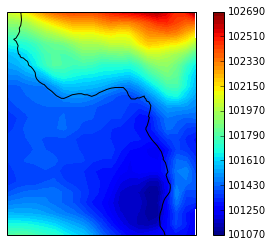

In [12]:
from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
# to show the plots inline
%matplotlib inline

lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()


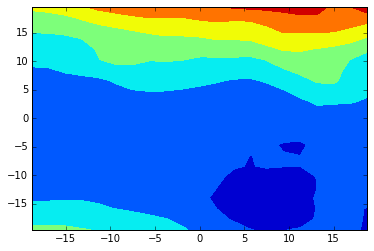

In [13]:
cs = plt.contourf(lons, lats, psl[0,:,:])

In [29]:
# same stepps with ocgis
from flyingpigeon.ocgis_module import call 

#from ocgis import RequestDataset ,OcgOperations
spatial_wrapping = 'wrap' # unwrap # None
nc = call(resources, geom=bbox_ocgis, spatial_wrapping=spatial_wrapping, dir_output=HOME+'/data/tests')
print nc

/home/nils/data/tests/309c69c6-3a27-11e6-a51e-f5923da83940.nc


In [30]:
#read in the data 
var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

In [39]:
print lon[:]

[   0.       1.875    3.75     5.625    7.5      9.375   11.25    13.125
   15.      16.875   18.75    20.625   22.5     24.375   26.25    28.125
   30.      31.875   33.75    35.625   37.5     39.375   41.25    43.125
   45.      46.875   48.75    50.625   52.5     54.375   56.25    58.125
   60.      61.875   63.75    65.625   67.5     69.375   71.25    73.125
   75.      76.875   78.75    80.625   82.5     84.375   86.25    88.125
   90.      91.875   93.75    95.625   97.5     99.375  101.25   103.125
  105.     106.875  108.75   110.625  112.5    114.375  116.25   118.125
  120.     121.875  123.75   125.625  127.5    129.375  131.25   133.125
  135.     136.875  138.75   140.625  142.5    144.375  146.25   148.125
  150.     151.875  153.75   155.625  157.5    159.375  161.25   163.125
  165.     166.875  168.75   170.625  172.5    174.375  176.25   178.125
  180.    -178.125 -176.25  -174.375 -172.5   -170.625 -168.75  -166.875
 -165.    -163.125 -161.25  -159.375 -157.5   -155.

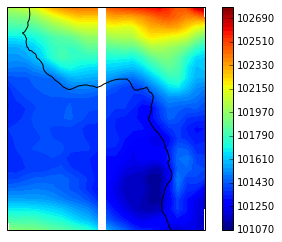

In [32]:
lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()

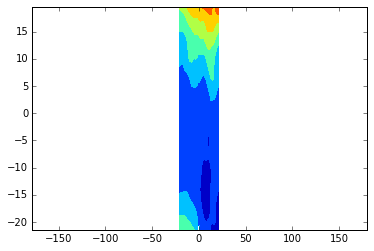

In [33]:
# cartopy puts it together how I would like to have it ;-) 
# simple plot shows the 'problem'
cs = plt.contourf(lons, lats, psl[0,:,:])

In [36]:
lon[:]

array([   0.   ,    1.875,    3.75 ,    5.625,    7.5  ,    9.375,
         11.25 ,   13.125,   15.   ,   16.875,   18.75 ,   20.625,
         22.5  ,   24.375,   26.25 ,   28.125,   30.   ,   31.875,
         33.75 ,   35.625,   37.5  ,   39.375,   41.25 ,   43.125,
         45.   ,   46.875,   48.75 ,   50.625,   52.5  ,   54.375,
         56.25 ,   58.125,   60.   ,   61.875,   63.75 ,   65.625,
         67.5  ,   69.375,   71.25 ,   73.125,   75.   ,   76.875,
         78.75 ,   80.625,   82.5  ,   84.375,   86.25 ,   88.125,
         90.   ,   91.875,   93.75 ,   95.625,   97.5  ,   99.375,
        101.25 ,  103.125,  105.   ,  106.875,  108.75 ,  110.625,
        112.5  ,  114.375,  116.25 ,  118.125,  120.   ,  121.875,
        123.75 ,  125.625,  127.5  ,  129.375,  131.25 ,  133.125,
        135.   ,  136.875,  138.75 ,  140.625,  142.5  ,  144.375,
        146.25 ,  148.125,  150.   ,  151.875,  153.75 ,  155.625,
        157.5  ,  159.375,  161.25 ,  163.125,  165.   ,  166.